<a href="https://colab.research.google.com/github/nimanthadilz/CS4622-lab-01/blob/main/lab_1_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
datasets_path = "/content/drive/MyDrive/colab-data/lab-1-feature-engineering/"
models_path = "/content/drive/MyDrive/colab-data/lab-1-feature-engineering/models/"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset Exploration

In [ ]:
train_df = pd.read_csv(datasets_path + "train.csv")
valid_df = pd.read_csv(datasets_path + "valid.csv")
test_df = pd.read_csv(datasets_path + "test.csv")
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
valid_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [ ]:
print("train_df row count: ", train_df.shape[0])
print("valid_df row count: ", valid_df.shape[0])

train_df row count:  28520
valid_df row count:  750


How many null values are there in label_2?

In [ ]:
# train dataset
count = train_df['label_2'].isna().sum()
print("count:", count)
print("percentage:", count / train_df.shape[0] * 100)

count: 480
percentage: 1.6830294530154277


In [ ]:
# valid dataset
count = valid_df['label_2'].isna().sum()
print("count:", count)
print("percentage:", count / valid_df.shape[0] * 100)

count: 14
percentage: 1.866666666666667


Are there any null values in any other column?

In [ ]:
# pd.set_option("display.max_columns", None)
null_values_present = train_df.loc[:, ~train_df.columns.isin(['label_2'])].isna().any().any()
print(null_values_present)

False


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 260 entries, feature_1 to label_4
dtypes: float64(257), int64(3)
memory usage: 56.6 MB


In [ ]:
train_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,-0.225478,-0.616421,-0.212878,0.336330,0.105467,-0.339634,-0.201756,0.742262,0.942325,-1.957584,...,-0.028098,0.296340,1.724439,-1.476765,0.687445,-1.563062,30.498843,27.975107,0.799299,5.997125
std,0.990632,1.005573,1.075468,1.248919,0.831132,1.073267,0.943505,1.055721,0.940459,0.876939,...,0.989497,1.173378,0.968611,1.032811,1.028328,1.243758,17.328389,5.735913,0.400532,2.375567
min,-4.023911,-5.582544,-4.679888,-4.284380,-3.010300,-5.034355,-4.355222,-3.806574,-2.922614,-5.203347,...,-3.679602,-3.905801,-3.301683,-5.490267,-3.810144,-6.056032,1.000000,22.000000,0.000000,0.000000
25%,-0.869656,-1.287018,-0.913419,-0.478661,-0.437171,-1.075753,-0.823699,0.064072,0.298269,-2.556436,...,-0.692262,-0.550897,1.121631,-2.130906,-0.008394,-2.404028,15.000000,25.000000,1.000000,6.000000
50%,-0.190790,-0.609782,-0.218800,0.295881,0.117310,-0.329571,-0.193263,0.755193,0.940786,-1.949847,...,-0.018218,0.295523,1.783432,-1.449978,0.639575,-1.650610,30.000000,27.000000,1.000000,6.000000
75%,0.457509,0.063174,0.490262,1.119242,0.657941,0.393339,0.417146,1.461846,1.579200,-1.345999,...,0.644112,1.128566,2.383575,-0.799414,1.347263,-0.805710,46.000000,30.000000,1.000000,6.000000
max,4.322171,3.876604,4.267163,5.828656,3.884939,3.890622,3.799406,4.817545,4.615069,1.147192,...,3.915582,4.458014,5.261775,2.861117,5.531152,3.338544,60.000000,61.000000,1.000000,13.000000


`label_1` (Speaker ID) column distribuiton

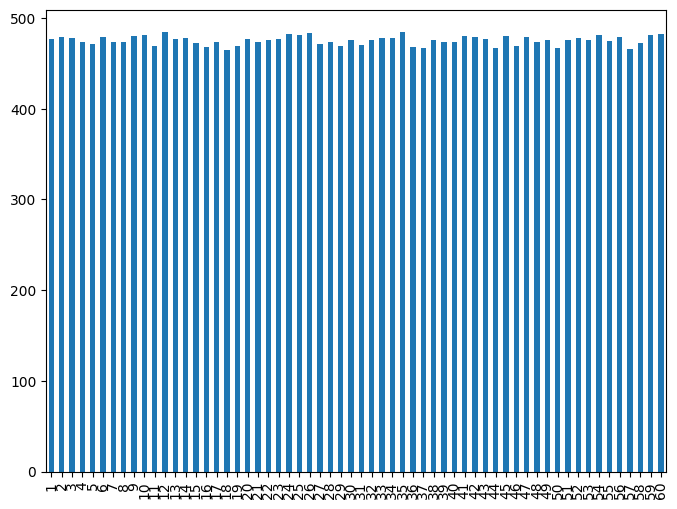

In [ ]:
plt.figure(figsize=(8, 6))
train_df['label_1'].value_counts().sort_index().plot(kind='bar')
plt.show()

`label_2` (Speaker Age) column distribuiton

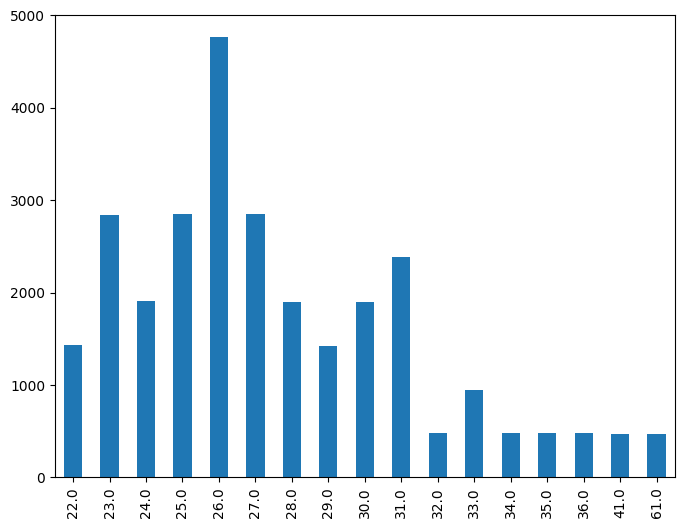

In [ ]:
plt.figure(figsize=(8, 6))
train_df['label_2'].value_counts().sort_index().plot(kind='bar')
plt.show()

`label_3` (Speaker Gender) column distribuiton

In [ ]:
print(train_df["label_3"].value_counts())
print(22796 / 5724)

1    22796
0     5724
Name: label_3, dtype: int64
3.9825296995108315


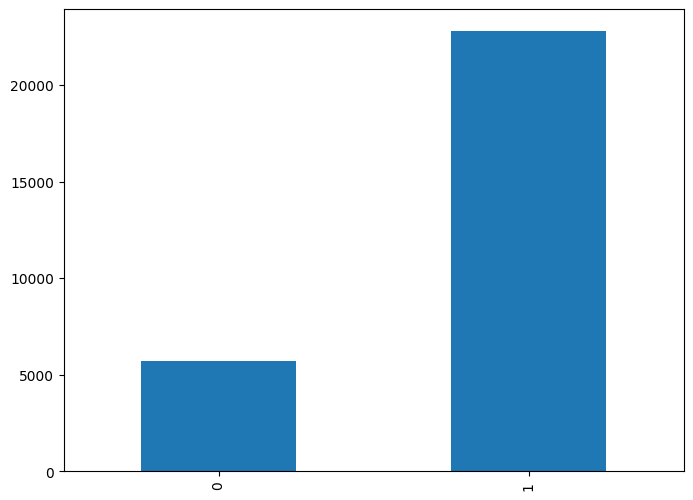

In [ ]:
plt.figure(figsize=(8, 6))
train_df['label_3'].value_counts().sort_index().plot(kind='bar')
plt.show()

`label_4` (Speaker Accent) column distribuiton

In [ ]:
print(train_df['label_4'].value_counts())
print(19938 / 465)

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: label_4, dtype: int64
42.87741935483871


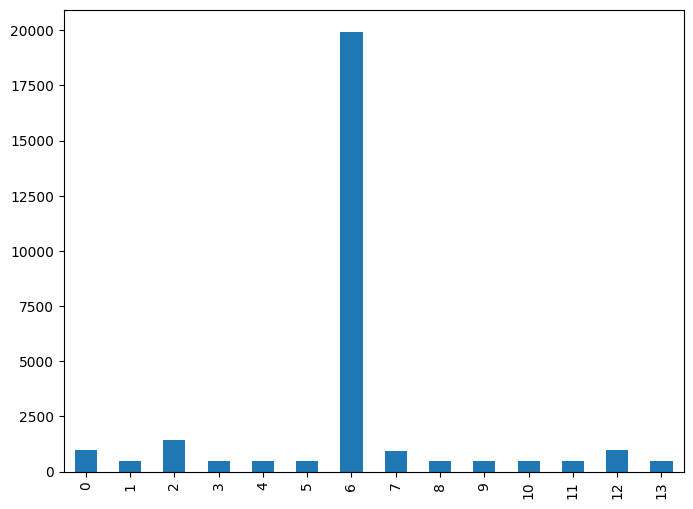

In [ ]:
plt.figure(figsize=(8, 6))
train_df['label_4'].value_counts().sort_index().plot(kind='bar')
plt.show()

## Handle Missing Data

In [ ]:
count = train_df['label_2'].isna().sum()
print("missing count in train:", count)
print("missing percentage in trian:", round(count / train_df.shape[0] * 100, 3))

count = valid_df['label_2'].isna().sum()
print("missing count in valid:", count)
print("missing percentage in valid:", round(count / valid_df.shape[0] * 100, 3))

count = test_df['label_2'].isna().sum()
print("missing count in test:", count)
print("missing percentage in test:", round(count / test_df.shape[0] * 100, 3))

missing count in train: 480
missing percentage in trian: 1.683
missing count in valid: 14
missing percentage in valid: 1.867
missing count in test: 6
missing percentage in test: 0.8


In [ ]:
train_df_label_2 = train_df.dropna(subset=['label_2'])
valid_df_label_2 = valid_df.dropna(subset=['label_2'])
test_df_label_2 = test_df.dropna(subset=['label_2'])

print(train_df_label_2.shape)
print(valid_df_label_2.shape)

(28040, 260)
(736, 260)


## Baseline Models

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

import xgboost as xgb

### Split Features and Labels

In [ ]:
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(train_df.iloc[:, :256])
X_valid = standard_scaler.transform(valid_df.iloc[:, :256])
X_test = standard_scaler.transform(test_df.iloc[:, :256])

X_train_label_2 = standard_scaler.fit_transform(train_df_label_2.iloc[:, :256])
X_valid_label_2 = standard_scaler.transform(valid_df_label_2.iloc[:, :256])
X_test_label_2 = standard_scaler.transform(test_df_label_2.iloc[:, :256])

label_1_train = train_df["label_1"]
label_2_train = train_df_label_2["label_2"]
label_3_train = train_df["label_3"]
label_4_train = train_df["label_4"]

label_1_valid = valid_df["label_1"]
label_2_valid = valid_df_label_2["label_2"]
label_3_valid = valid_df["label_3"]
label_4_valid = valid_df["label_4"]

label_1_test = test_df["label_1"]
label_2_test = test_df_label_2["label_2"]
label_3_test = test_df["label_3"]
label_4_test = test_df["label_4"]


### Handling Imbalanced `label_4` (Speaker Accent)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
oversampler = RandomOverSampler(sampling_strategy="not majority")
undersampler = RandomUnderSampler(sampling_strategy="majority")

X_under, y_under = undersampler.fit_resample(X_train, label_4_train)

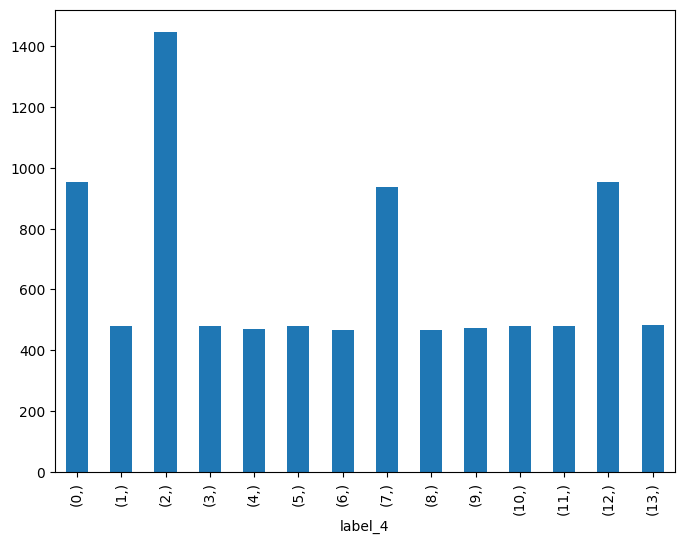

In [ ]:
counts = pd.DataFrame(y_under).value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.show()

### Train and Evaluate Baseline Models

In [ ]:
def train_svm(X_train, y_train, set_class_weight=False):
  linear_svm = None
  if (set_class_weight):
    linear_svm = SVC(kernel='linear', class_weight='balanced')
  else:
    linear_svm = SVC(kernel='linear')

  linear_svm.fit(X_train, y_train)
  return linear_svm

def train_random_forest(X_train, y_train):
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

  rf_classifier.fit(X_train, y_train)
  return rf_classifier

def train_xg_boost_regression(X_train, y_train):
  xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
  xgb_model.fit(X_train, y_train)
  return xgb_model

def predict(X_valid, model):
  pred = model.predict(X_valid)
  return pred

def calculate_accuracy(pred_y, valid_y):
  accuracy = accuracy_score(valid_y, pred_y)
  return accuracy

def predict_and_calculate_accuracy(X, y, model, is_regression=False):
  pred = predict(X, model)
  if (is_regression):
    return mean_squared_error(y, pred, squared=False)
  return accuracy_score(pred, y)

In [ ]:
# SVM
svm_1 = train_svm(X_train, label_1_train)

In [ ]:
svm_3 = train_svm(X_train, label_3_train)

In [ ]:
svm_4 = train_svm(X_train, label_4_train, set_class_weight=True)
svm_4_under = train_svm(X_under, y_under)

In [ ]:
# Random Forest
rf_1 = train_random_forest(X_train, label_1_train)

In [ ]:
rf_3 = train_random_forest(X_train, label_3_train)

In [ ]:
rf_4 = train_random_forest(X_train, label_4_train)
rf_4_under = train_random_forest(X_under, y_under)

In [ ]:
# XGBoost
xg_2 = train_xg_boost_regression(X_train_label_2, label_2_train)

In [ ]:
# Save models
dump(svm_1, models_path + "svm_1.joblib")
dump(svm_3, models_path + "svm_3.joblib")
dump(svm_4, models_path + "svm_4.joblib")
dump(svm_4_under, models_path + "svm_4_under.joblib")
dump(rf_1, models_path + "rf_1.joblib")
dump(rf_3, models_path + "rf_3.joblib")
dump(rf_4, models_path + "rf_4.joblib")
dump(rf_4_under, models_path + "rf_4_under.joblib")
dump(xg_2, models_path + "xg_2.joblib")

['/content/drive/MyDrive/colab-data/lab-1-feature-engineering/models/xg_2.joblib']

In [ ]:
# models
svm_1 = load(models_path + "svm_1.joblib")
svm_3 = load(models_path + "svm_3.joblib")
svm_4 = load(models_path + "svm_4.joblib")
svm_4_under = load(models_path + "svm_4_under.joblib")
rf_1 = load(models_path + "rf_1.joblib")
rf_3 = load(models_path + "rf_3.joblib")
rf_4 = load(models_path + "rf_4.joblib")
rf_4_under = load(models_path + "rf_4_under.joblib")
xg_2 = load(models_path + "xg_2.joblib")

In [ ]:
# label_1 (Speaker ID)
print("label_1 (Speaker ID)")
# SVM
pred_valid_label_1_svm = predict(X_valid, svm_1)
valid_accuracy_label_1_svm = calculate_accuracy(pred_valid_label_1_svm, label_1_valid)
print("Validation Accuracy for predicting label_1 using SVM:", round(valid_accuracy_label_1_svm, 3))
pred_test_label_1_svm = predict(X_test, svm_1)
test_accuracy_label_1_svm = calculate_accuracy(pred_test_label_1_svm, label_1_test)
print("Test Accuracy for predicting label_1 using SVM:", round(test_accuracy_label_1_svm, 3))

# Random Forest
pred_valid_label_1_rf = predict(X_valid, rf_1)
valid_accuracy_label_1_rf = calculate_accuracy(pred_valid_label_1_rf, label_1_valid)
print("Validation Accuracy for predicting label_1 using Random Forest:", round(valid_accuracy_label_1_rf, 3))
pred_test_label_1_rf = predict(X_test, rf_1)
test_accuracy_label_1_rf = calculate_accuracy(pred_test_label_1_rf, label_1_test)
print("Test Accuracy for predicting label_1 using Random Forest:", round(test_accuracy_label_1_rf, 3))

print("\n")

# label_2 (Speaker Age)
# XGBoost
pred_valid_label_2_xgb = predict(X_valid_label_2, xg_2)
valid_rmse_label_2_xgb = mean_squared_error(label_2_valid, pred_valid_label_2_xgb, squared=False)
print("Validation RMSE for predicting label_2 using XGBoost:", round(valid_rmse_label_2_xgb, 3))
pred_test_label_2_xgb = predict(X_test_label_2, xg_2)
test_rmse_label_2_xgb = mean_squared_error(label_2_test, pred_test_label_2_xgb, squared=False)
print("Test RMSE for predicting label_2 using XGBoost:", round(test_rmse_label_2_xgb, 3))

print("\n")

# label_3 (Speaker Gender)
print("label_3 (Speaker Gender)")
# SVM
pred_valid_label_3_svm = predict(X_valid, rf_3)
valid_accuracy_label_3_svm = calculate_accuracy(pred_valid_label_3_svm, label_3_valid)
print("Validation Accuracy for predicting label_3 using SVM:", round(valid_accuracy_label_3_svm, 3))
pred_test_label_3_svm = predict(X_test, svm_3)
test_accuracy_label_3_svm = calculate_accuracy(pred_test_label_3_svm, label_3_test)
print("Test Accuracy for predicting label_3 using SVM:", round(test_accuracy_label_3_svm, 3))

# Random Forest
pred_valid_label_3_rf = predict(X_valid, rf_3)
valid_accuracy_label_3_rf = calculate_accuracy(pred_valid_label_3_rf, label_3_valid)
print("Validation Accuracy for predicting label_3 using Random Forest:", round(valid_accuracy_label_3_rf, 3))
pred_test_label_3_rf = predict(X_test, rf_3)
test_accuracy_label_3_rf = calculate_accuracy(pred_test_label_3_rf, label_3_test)
print("Accuracy for predicting label_3 using Random Forest:", round(test_accuracy_label_3_rf, 3))

print("\n")

# label_4 (Speaker Accent)
print("label_4 (Speaker Accent)")
# SVM
pred_valid_label_4_svm = predict(X_valid, svm_4)
valid_accuracy_label_4_svm = calculate_accuracy(pred_valid_label_4_svm, label_4_valid)
print("Validation Accuracy for predicting label_4 using SVM:", round(valid_accuracy_label_4_svm, 3))
pred_test_label_4_svm = predict(X_test, svm_4)
test_accuracy_label_4_svm = calculate_accuracy(pred_test_label_4_svm, label_4_test)
print("Test Accuracy for predicting label_4 using SVM:", round(test_accuracy_label_4_svm, 3))

# Random Forest
pred_valid_label_4_rf = predict(X_valid, rf_4)
valid_accuracy_label_4_rf = calculate_accuracy(pred_valid_label_4_rf, label_4_valid)
print("Validation Accuracy for predicting label_4 using Random Forest:", round(valid_accuracy_label_4_rf, 3))
pred_test_label_4_rf = predict(X_test, rf_4)
test_accuracy_label_4_rf = calculate_accuracy(pred_test_label_4_rf, label_4_test)
print("Accuracy for predicting label_4 using Random Forest:", round(test_accuracy_label_4_rf, 3))

# Using model trained with undersampled data for label_4
print("\nlabel_4 (Speaker Accent) - Undersampled")
# SVM
pred_valid_label_4_svm = predict(X_valid, svm_4_under)
valid_accuracy_label_4_svm = calculate_accuracy(pred_valid_label_4_svm, label_4_valid)
print("Validation Accuracy for predicting label_4 using SVM:", round(valid_accuracy_label_4_svm, 3))
pred_test_label_4_svm = predict(X_test, svm_4_under)
test_accuracy_label_4_svm = calculate_accuracy(pred_test_label_4_svm, label_4_test)
print("Test Accuracy for predicting label_4 using SVM:", round(test_accuracy_label_4_svm, 3))

# Random Forest
pred_valid_label_4_rf = predict(X_valid, rf_4_under)
valid_accuracy_label_4_rf = calculate_accuracy(pred_valid_label_4_rf, label_4_valid)
print("Validation Accuracy for predicting label_4 using Random Forest:", round(valid_accuracy_label_4_rf, 3))
pred_test_label_4_rf = predict(X_test, rf_4_under)
test_accuracy_label_4_rf = calculate_accuracy(pred_test_label_4_rf, label_4_test)
print("Accuracy for predicting label_4 using Random Forest:", round(test_accuracy_label_4_rf, 3))

label_1 (Speaker ID)
Validation Accuracy for predicting label_1 using SVM: 0.991
Test Accuracy for predicting label_1 using SVM: 0.989
Validation Accuracy for predicting label_1 using Random Forest: 0.967
Test Accuracy for predicting label_1 using Random Forest: 0.968


Validation RMSE for predicting label_2 using XGBoost: 3.29
Test RMSE for predicting label_2 using XGBoost: 3.143


label_3 (Speaker Gender)
Validation Accuracy for predicting label_3 using SVM: 0.995
Test Accuracy for predicting label_3 using SVM: 1.0
Validation Accuracy for predicting label_3 using Random Forest: 0.995
Accuracy for predicting label_3 using Random Forest: 0.997


label_4 (Speaker Accent)
Validation Accuracy for predicting label_4 using SVM: 0.937
Test Accuracy for predicting label_4 using SVM: 0.933
Validation Accuracy for predicting label_4 using Random Forest: 0.844
Accuracy for predicting label_4 using Random Forest: 0.857

label_4 (Speaker Accent) - Undersampled
Validation Accuracy for predicting la

## Feature Engineering

### Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

exp_var_pca_1 = pca.explained_variance_ratio_
cum_sum_eigenvalues_1 = np.cumsum(exp_var_pca_1)

X_train_label_2_pca = pca.fit_transform(X_train_label_2)
X_valid_label_2_pca = pca.transform(X_valid_label_2)
X_test_label_2_pca = pca.transform(X_test_label_2)

exp_var_pca_2 = pca.explained_variance_ratio_
cum_sum_eigenvalues_2 = np.cumsum(exp_var_pca_2)

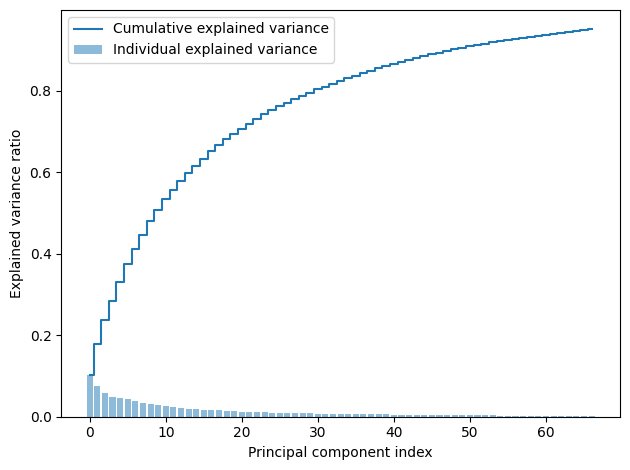

In [ ]:
plt.bar(range(0, len(exp_var_pca_1)), exp_var_pca_1, alpha=0.5, label="Individual explained variance")
plt.step(range(0, len(cum_sum_eigenvalues_1)), cum_sum_eigenvalues_1, where="mid", label="Cumulative explained variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print(X_train_pca.shape)
print(X_valid_pca.shape)
print(X_test_pca.shape)

(28520, 67)
(750, 67)
(750, 67)


#### Predicting Label 1 (Speaker ID)

In [ ]:
# SVM
svm_1_pca = train_svm(X_train_pca, label_1_train)

# Random Forest
rf_1_pca = train_random_forest(X_train_pca, label_1_train)

In [ ]:
dump(svm_1_pca, models_path + "svm_1_pca.joblib")
dump(rf_1_pca, models_path + "rf_1_pca.joblib")

['/content/drive/MyDrive/colab-data/lab-1-feature-engineering/models/rf_1_pca.joblib']

In [ ]:
svm_1_pca = load(models_path + "svm_1_pca.joblib")
rf_1_pca = load(models_path + "rf_1_pca.joblib")

In [ ]:
# validation data
pred_valid_label_1_svm_pca = predict(X_valid_pca, svm_1_pca)
valid_accuracy_label_1_svm_pca = calculate_accuracy(pred_valid_label_1_svm_pca, label_1_valid)
print("Validation Accuracy for predicting label_1 using SVM:", round(valid_accuracy_label_1_svm_pca, 3))

pred_valid_label_1_rf_pca = predict(X_valid_pca, rf_1_pca)
valid_accuracy_label_1_rf_pca = calculate_accuracy(pred_valid_label_1_rf_pca, label_1_valid)
print("Validation Accuracy for predicting label_1 using Random Forest:", round(valid_accuracy_label_1_rf_pca, 3))

# test data
pred_test_label_1_svm_pca = predict(X_test_pca, svm_1_pca)
test_accuracy_label_1_svm_pca = calculate_accuracy(pred_test_label_1_svm_pca, label_1_test)
print("Test Accuracy for predicting label_1 using SVM:", round(test_accuracy_label_1_svm_pca, 3))

pred_test_label_1_rf_pca = predict(X_test_pca, rf_1_pca)
test_accuracy_label_1_rf_pca = calculate_accuracy(pred_test_label_1_rf_pca, label_1_test)
print("Test Accuracy for predicting label_1 using Random Forest:", round(test_accuracy_label_1_rf_pca, 3))

Validation Accuracy for predicting label_1 using SVM: 0.981
Validation Accuracy for predicting label_1 using Random Forest: 0.967
Test Accuracy for predicting label_1 using SVM: 0.973
Test Accuracy for predicting label_1 using Random Forest: 0.975


#### Predicting Label 2 (Speaker Age)

In [ ]:
# XGBoost
xgb_2_pca = train_xg_boost_regression(X_train_label_2_pca, label_2_train)

In [ ]:
dump(xgb_2_pca, models_path + "xgb_2_pca.joblib")

['/content/drive/MyDrive/colab-data/lab-1-feature-engineering/models/xgb_2_pca.joblib']

In [ ]:
xgb_2_pca = load(models_path + "xgb_2_pca.joblib")

In [ ]:
# validation data
pred_valid_label_2_xgb_pca = predict(X_valid_label_2_pca, xgb_2_pca)
valid_rmse_label_2_xgb_pca = mean_squared_error(label_2_valid, pred_valid_label_2_xgb_pca, squared=False)
print("Validation RMSE for predicting label_2 using XGBoost:", round(valid_rmse_label_2_xgb_pca, 3))

# test data
pred_test_label_2_xgb_pca = predict(X_test_label_2_pca, xgb_2_pca)
test_rmse_label_2_xgb_pca = mean_squared_error(label_2_test, pred_test_label_2_xgb_pca, squared=False)
print("Test RMSE for predicting label_2 using XGBoost:", round(test_rmse_label_2_xgb_pca, 3))

Validation RMSE for predicting label_2 using XGBoost: 3.675
Test RMSE for predicting label_2 using XGBoost: 3.403


#### Predicting Label 3 (Speaker Gender)

In [ ]:
# SVM
svm_3_pca = train_svm(X_train_pca, label_3_train)

# Random Forest
rf_3_pca = train_random_forest(X_train_pca, label_3_train)

In [ ]:
dump(svm_3_pca, models_path + "svm_3_pca.joblib")
dump(rf_3_pca, models_path + "rf_3_pca.joblib")

['/content/drive/MyDrive/colab-data/lab-1-feature-engineering/models/rf_3_pca.joblib']

In [ ]:
svm_3_pca = load(models_path + "svm_3_pca.joblib")
rf_3_pca = load(models_path + "rf_3_pca.joblib")

In [ ]:
# validation data
pred_valid_label_3_svm_pca = predict(X_valid_pca, svm_3_pca)
valid_accuracy_label_3_svm_pca = calculate_accuracy(pred_valid_label_3_svm_pca, label_3_valid)
print("Validation Accuracy for predicting label_3 using SVM:", round(valid_accuracy_label_3_svm_pca, 3))

pred_valid_label_3_rf_pca = predict(X_valid_pca, rf_3_pca)
valid_accuracy_label_3_rf_pca = calculate_accuracy(pred_valid_label_3_rf_pca, label_3_valid)
print("Validation Accuracy for predicting label_3 using Random Forest:", round(valid_accuracy_label_3_rf_pca, 3))

# test data
pred_test_label_3_svm_pca = predict(X_test_pca, svm_3_pca)
test_accuracy_label_3_svm_pca = calculate_accuracy(pred_test_label_3_svm_pca, label_3_test)
print("Test Accuracy for predicting label_3 using SVM:", round(test_accuracy_label_3_svm_pca, 3))

pred_test_label_3_rf_pca = predict(X_test_pca, rf_3_pca)
test_accuracy_label_3_rf_pca = calculate_accuracy(pred_test_label_3_rf_pca, label_3_test)
print("Test Accuracy for predicting label_3 using Random Forest:", round(test_accuracy_label_3_rf_pca, 3))

Validation Accuracy for predicting label_3 using SVM: 0.999
Validation Accuracy for predicting label_3 using Random Forest: 0.999
Test Accuracy for predicting label_3 using SVM: 0.997
Test Accuracy for predicting label_3 using Random Forest: 0.992


#### Predicting Label 4 (Speaker Accent)

In [ ]:
# SVM
svm_4_pca = train_svm(X_train_pca, label_4_train)

# Random Forest
rf_4_pca = train_random_forest(X_train_pca, label_4_train)

In [ ]:
dump(svm_4_pca, models_path + "svm_4_pca.joblib")
dump(rf_4_pca, models_path + "rf_4_pca.joblib")

['/content/drive/MyDrive/colab-data/lab-1-feature-engineering/models/rf_4_pca.joblib']

In [ ]:
svm_4_pca = load(models_path + "svm_4_pca.joblib")
rf_4_pca = load(models_path + "rf_4_pca.joblib")

In [ ]:
# validation data
pred_valid_label_4_svm_pca = predict(X_valid_pca, svm_4_pca)
valid_accuracy_label_4_svm_pca = calculate_accuracy(pred_valid_label_4_svm_pca, label_4_valid)
print("Validation Accuracy for predicting label_4 using SVM:", round(valid_accuracy_label_4_svm_pca, 3))

pred_valid_label_4_rf_pca = predict(X_valid_pca, rf_4_pca)
valid_accuracy_label_4_rf_pca = calculate_accuracy(pred_valid_label_4_rf_pca, label_4_valid)
print("Validation Accuracy for predicting label_4 using Random Forest:", round(valid_accuracy_label_4_rf_pca, 3))

# test data
pred_test_label_4_svm_pca = predict(X_test_pca, svm_4_pca)
test_accuracy_label_4_svm_pca = calculate_accuracy(pred_test_label_4_svm_pca, label_4_test)
print("Test Accuracy for predicting label_4 using SVM:", round(test_accuracy_label_4_svm_pca, 3))

pred_test_label_4_rf_pca = predict(X_test_pca, rf_4_pca)
test_accuracy_label_4_rf_pca = calculate_accuracy(pred_test_label_4_rf_pca, label_4_test)
print("Test Accuracy for predicting label_4 using Random Forest:", round(test_accuracy_label_4_rf_pca, 3))

Validation Accuracy for predicting label_4 using SVM: 0.908
Validation Accuracy for predicting label_4 using Random Forest: 0.821
Test Accuracy for predicting label_4 using SVM: 0.924
Test Accuracy for predicting label_4 using Random Forest: 0.831


### ANOVA F-test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
fs_classif = SelectKBest(score_func=f_classif, k=67)
fs_classif.fit(X_train, label_1_train)

X_train_fs = fs_classif.transform(X_train)
X_valid_fs = fs_classif.transform(X_valid)
X_test_fs = fs_classif.transform(X_test)

fs_reg = SelectKBest(score_func=f_regression, k=67)
fs_reg.fit(X_train_label_2, label_2_train)

X_train_label_2_fs = fs_reg.transform(X_train_label_2)
X_valid_label_2_fs = fs_classif.transform(X_valid_label_2)
X_test_label_2_fs = fs_classif.transform(X_test_label_2)

In [ ]:
svm_1_fs = train_svm(X_train_fs, label_1_train)
rf_1_fs = train_random_forest(X_train_fs, label_1_train)

xgb_2_fs = train_xg_boost_regression(X_train_label_2_fs, label_2_train)

svm_3_fs = train_svm(X_train_fs, label_3_train)
rf_3_fs = train_random_forest(X_train_fs, label_3_train)

svm_4_fs = train_svm(X_train_fs, label_4_train)
rf_4_fs = train_random_forest(X_train_fs, label_4_train)

In [ ]:
dump(svm_1_fs, models_path + "svm_1_fs.joblib")
dump(rf_1_fs, models_path + "rf_1_fs.joblib")
dump(xgb_2_fs, models_path + "xgb_2_fs.joblib")
dump(svm_3_fs, models_path + "svm_3_fs.joblib")
dump(rf_3_fs, models_path + "rf_3_fs.joblib")
dump(svm_4_fs, models_path + "svm_4_fs.joblib")
dump(rf_4_fs, models_path + "rf_4_fs.joblib")

['/content/drive/MyDrive/colab-data/lab-1-feature-engineering/models/rf_4_fs.joblib']

In [ ]:
svm_1_fs = load(models_path + "svm_1_fs.joblib")
rf_1_fs = load(models_path + "rf_1_fs.joblib")
xgb_2_fs = load(models_path + "xgb_2_fs.joblib")
svm_3_fs = load(models_path + "svm_3_fs.joblib")
rf_3_fs = load(models_path + "rf_3_fs.joblib")
svm_4_fs = load(models_path + "svm_4_fs.joblib")
rf_4_fs = load(models_path + "rf_4_fs.joblib")

In [ ]:
# label_1
# validation data
pred_valid_label_1_svm_fs = predict(X_valid_fs, svm_1_fs)
valid_accuracy_label_1_svm_fs = calculate_accuracy(pred_valid_label_1_svm_fs, label_1_valid)
print("Validation Accuracy for predicting label_1 using SVM:", round(valid_accuracy_label_1_svm_fs, 3))

pred_valid_label_1_rf_fs = predict(X_valid_fs, rf_1_fs)
valid_accuracy_label_1_rf_fs = calculate_accuracy(pred_valid_label_1_rf_fs, label_1_valid)
print("Validation Accuracy for predicting label_1 using Random Forest:", round(valid_accuracy_label_1_rf_fs, 3))

# test data
pred_test_label_1_svm_fs = predict(X_test_fs, svm_1_fs)
test_accuracy_label_1_svm_fs = calculate_accuracy(pred_test_label_1_svm_fs, label_1_test)
print("Test Accuracy for predicting label_1 using SVM:", round(test_accuracy_label_1_svm_fs, 3))

pred_test_label_1_rf_fs = predict(X_test_fs, rf_1_fs)
test_accuracy_label_1_rf_fs = calculate_accuracy(pred_test_label_1_rf_fs, label_1_test)
print("Test Accuracy for predicting label_1 using Random Forest:", round(test_accuracy_label_1_rf_fs, 3))

print("\n")

# label_2
# validation data
pred_valid_label_2_xgb_fs = predict(X_valid_label_2_fs, xgb_2_fs)
valid_rmse_label_2_xgb_fs = mean_squared_error(label_2_valid, pred_valid_label_2_xgb_fs, squared=False)
print("Validation RMSE for predicting label_2 using XGBoost:", round(valid_rmse_label_2_xgb_fs, 3))

# test data
pred_test_label_2_xgb_fs = predict(X_test_label_2_fs, xgb_2_fs)
test_rmse_label_2_xgb_fs = mean_squared_error(label_2_test, pred_test_label_2_xgb_fs, squared=False)
print("Test RMSE for predicting label_2 using XGBoost:", round(test_rmse_label_2_xgb_fs, 3))

print("\n")

# label_3
# validation data
pred_valid_label_3_svm_fs = predict(X_valid_fs, svm_3_fs)
valid_accuracy_label_3_svm_fs = calculate_accuracy(pred_valid_label_3_svm_fs, label_3_valid)
print("Validation Accuracy for predicting label_3 using SVM:", round(valid_accuracy_label_3_svm_fs, 3))

pred_valid_label_3_rf_fs = predict(X_valid_fs, rf_3_fs)
valid_accuracy_label_3_rf_fs = calculate_accuracy(pred_valid_label_3_rf_fs, label_3_valid)
print("Validation Accuracy for predicting label_3 using Random Forest:", round(valid_accuracy_label_3_rf_fs, 3))

# test data
pred_test_label_3_svm_fs = predict(X_test_fs, svm_3_fs)
test_accuracy_label_3_svm_fs = calculate_accuracy(pred_test_label_3_svm_fs, label_3_test)
print("Test Accuracy for predicting label_3 using SVM:", round(test_accuracy_label_3_svm_fs, 3))

pred_test_label_3_rf_fs = predict(X_test_fs, rf_3_fs)
test_accuracy_label_3_rf_fs = calculate_accuracy(pred_test_label_3_rf_fs, label_3_test)
print("Test Accuracy for predicting label_3 using Random Forest:", round(test_accuracy_label_3_rf_fs, 3))

print("\n")

# label_4
# validation data
pred_valid_label_4_svm_fs = predict(X_valid_fs, svm_4_fs)
valid_accuracy_label_4_svm_fs = calculate_accuracy(pred_valid_label_4_svm_fs, label_4_valid)
print("Validation Accuracy for predicting label_4 using SVM:", round(valid_accuracy_label_4_svm_fs, 3))

pred_valid_label_4_rf_fs = predict(X_valid_fs, rf_4_fs)
valid_accuracy_label_4_rf_fs = calculate_accuracy(pred_valid_label_4_rf_fs, label_4_valid)
print("Validation Accuracy for predicting label_4 using Random Forest:", round(valid_accuracy_label_4_rf_fs, 3))

# test data
pred_test_label_4_svm_fs = predict(X_test_fs, svm_4_fs)
test_accuracy_label_4_svm_fs = calculate_accuracy(pred_test_label_4_svm_fs, label_4_test)
print("Test Accuracy for predicting label_4 using SVM:", round(test_accuracy_label_4_svm_fs, 3))

pred_test_label_4_rf_fs = predict(X_test_fs, rf_4_fs)
test_accuracy_label_4_rf_fs = calculate_accuracy(pred_test_label_4_rf_fs, label_4_test)
print("Test Accuracy for predicting label_4 using Random Forest:", round(test_accuracy_label_4_rf_fs, 3))


Validation Accuracy for predicting label_1 using SVM: 0.957
Validation Accuracy for predicting label_1 using Random Forest: 0.947
Test Accuracy for predicting label_1 using SVM: 0.956
Test Accuracy for predicting label_1 using Random Forest: 0.928


Validation RMSE for predicting label_2 using XGBoost: 7.282
Test RMSE for predicting label_2 using XGBoost: 6.64


Validation Accuracy for predicting label_3 using SVM: 0.997
Validation Accuracy for predicting label_3 using Random Forest: 0.993
Test Accuracy for predicting label_3 using SVM: 0.997
Test Accuracy for predicting label_3 using Random Forest: 0.993


Validation Accuracy for predicting label_4 using SVM: 0.895
Validation Accuracy for predicting label_4 using Random Forest: 0.84
Test Accuracy for predicting label_4 using SVM: 0.913
Test Accuracy for predicting label_4 using Random Forest: 0.855


## CSV File Generation

In [ ]:
import csv

In [ ]:
output_path = "/content/drive/MyDrive/colab-data/lab-1-feature-engineering/output/"
file_prefix = "190111B_"
labels = ["label_1", "label_2", "label_3", "label_4"]

In [ ]:
print(len(X_test_pca[:,0]))

750


In [ ]:
predictions_before = [pred_test_label_1_svm, pred_test_label_2_xgb, pred_test_label_3_svm, pred_test_label_4_svm]
predictions_after = [pred_test_label_1_svm_pca, pred_test_label_2_xgb_pca, pred_test_label_3_svm_pca, pred_test_label_4_svm_pca]

def create_dataframe_for_label(label_idx):
  df = pd.DataFrame()
  df["Predicted labels before feature engineering"] = predictions_before[label_idx]
  df["Predicted labels after feature engineering"] = predictions_after[label_idx]
  new_feature_count = X_test_pca.shape[1]
  df["No of new features"] = new_feature_count
  for i in range(new_feature_count):
    if (label_idx == 1):
      df["new_feature_" + str(i+1)] = X_test_label_2_pca[:, i]
    else:
      df["new_feature_" + str(i+1)] = X_test_pca[:, i]

  empty_columns = []
  for j in range(new_feature_count,256):
    empty_columns.append("new_feature_" + str(j+1))

  df = pd.concat([df, pd.DataFrame(columns=empty_columns)])
  return df


In [ ]:
create_dataframe_for_label(2)

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,1.0,1.0,67.0,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,67.0,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,67.0,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,67.0,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,67.0,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.0,1.0,67.0,0.370687,-1.536461,-7.516708,4.317870,0.249244,-3.122142,0.695939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,1.0,1.0,67.0,11.165413,4.127378,-1.536515,-0.896263,-0.214402,0.636541,0.736327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747,1.0,1.0,67.0,-5.593004,2.172272,-2.118896,-1.539570,2.049187,4.802564,-5.281143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,1.0,1.0,67.0,-4.349980,3.831893,3.496943,3.157099,-2.192043,-0.095471,-0.314058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for label_idx in range(len(labels)):
  df = create_dataframe_for_label(label_idx)
  df.to_csv(output_path + file_prefix + labels[label_idx] + ".csv", index=False)